In [2]:
from astropy.io import fits
import glob

import numpy as np
np.version.version
from matplotlib import pyplot as plt
%matplotlib inline

import scipy.ndimage

import matplotlib as mpl
mpl.colors
mpl.colors.PowerNorm


matplotlib.colors.PowerNorm

In [4]:
!dir F:\Data_Pipeline\Echelle++_sim_rd1

 Volume in drive F is Lexar
 Volume Serial Number is B402-F7B3

 Directory of F:\Data_Pipeline\Echelle++_sim_rd1

01/18/2019  09:52 AM    <DIR>          .
01/18/2019  09:52 AM    <DIR>          ..
01/18/2019  08:51 AM        67,112,640 MaroonX blackbody (1).fit
01/17/2019  12:56 PM        67,112,640 MaroonX_blackbody.fit
               2 File(s)    134,225,280 bytes
               2 Dir(s)   7,722,283,008 bytes free


In [6]:
#MaroonX blackbody fits
h= fits.open('F:\Data_Pipeline\Echelle++_sim_rd1\MaroonX_blackbody.fit')
Mar_r1= h[0].data

0 183 52.544981631363


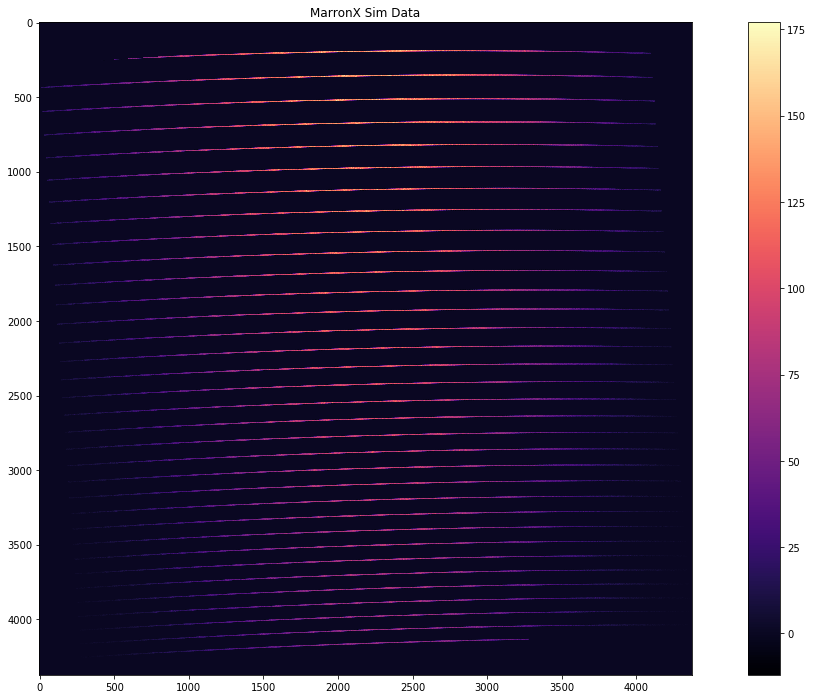

In [8]:
Min = np.nanmin(Mar_r1)
Max = np.nanmax(Mar_r1)
Std = np.nanstd(Mar_r1)
Mean = np.mean(Mar_r1)

print(zMin, zMax, zStd*3)

# Define a normaliser object
#norm = mpl.colors.PowerNorm(0.5, vmin=zMin, vmax=zStd*3)

rot_Mar_r1 = scipy.ndimage.rotate(Mar_r1,4)
plt.imshow(rot_Mar_r1, cmap='magma', aspect='equal', interpolation='none')
plt.colorbar()
#plt.clim(3354,2529) #adjust this to set the upper and lower range of the colorbar
plt.gcf().set_size_inches(20,12)
plt.title('MarronX Sim Data')
plt.savefig("MarronX Sim Data r1")

In [10]:
Mean = np.mean(Mar_r1)
Mean

4.245119154453278

Text(0.5,1,'MaroonX SLice')

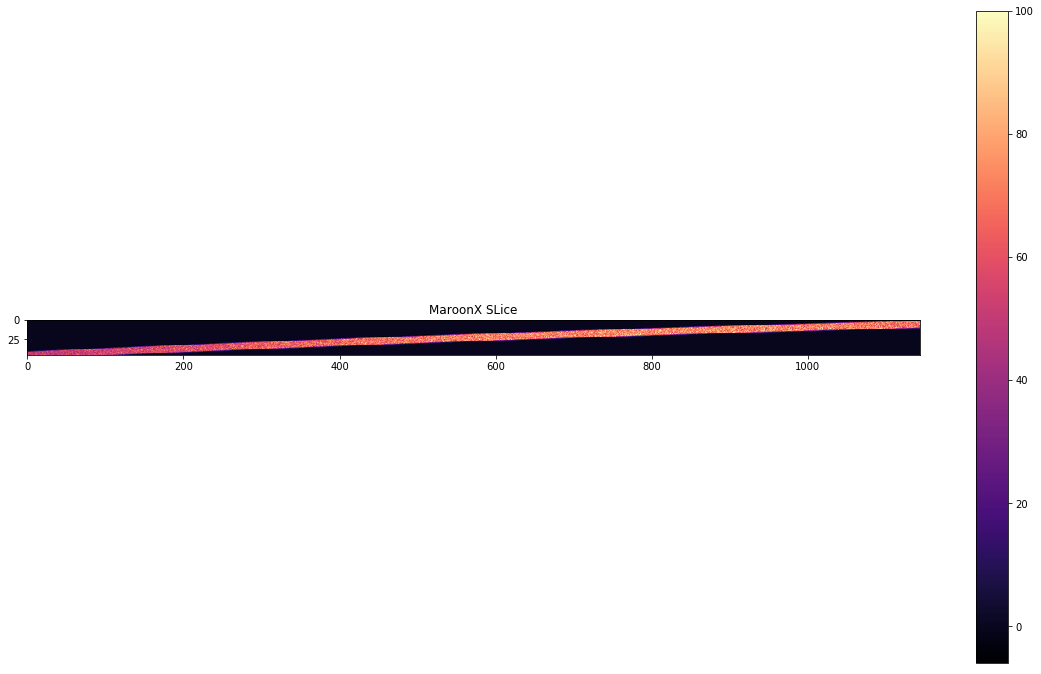

In [21]:
maxY=3725
minY=3680
minX=1504
maxX=2648
Cut = rot_Mar_r1[minY:maxY, minX:maxX]

plt.imshow(Cut, cmap='magma', aspect='equal', interpolation='none')
plt.colorbar()
# plt.clim(3354,2529) #adjust this to set the upper and lower range of the colorbar
plt.gcf().set_size_inches(20,12)
plt.title('MaroonX SLice')

Text(0.5,0.98,'Science Spectra')

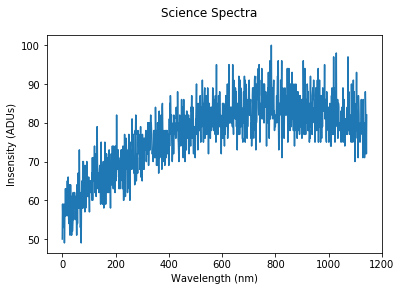

In [23]:
cutAvg=np.nanmax(Cut, axis=0)
plt.plot(cutAvg)
plt.xlabel ('Wavelength (nm)')
plt.ylabel ('Insensity (ADUs)')
plt.suptitle('Science Spectra')